In [1]:
# Versão do python
from platform import python_version
print("Versão da linguagem python usada neste notebook: ", python_version())

Versão da linguagem python usada neste notebook:  3.9.12


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou propt de comando
# pip install -U nome_do_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
#!pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook

# Instalar o pacote whatermark
# Esse pacote é usado para gravar as versões de outros pacotes usados neste notebook
#!pip install -q -U watermark

#!pip install seaborn

In [3]:
# Import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import warnings

In [4]:
sns.set_style('whitegrid')
%matplotlib inline
warnings.filterwarnings('ignore', category=FutureWarning)

In [5]:
# Versão dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Eric Gomes" --iversions

Author: Eric Gomes

sklearn   : 0.0
numpy     : 1.22.4
seaborn   : 0.11.2
pandas    : 1.4.3
matplotlib: 3.5.3



In [6]:
# Carregando dados
dados = pd.read_csv('dados/dataset.csv')

In [7]:
dados.shape

(500, 5)

In [8]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [9]:
# Amostra dos dados
dados.sample(10)

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
353,2.957449,34.729080,11.966898,36.547596,506.132342
452,3.046620,34.370327,11.887800,37.861447,491.911505
327,3.049196,32.872739,12.093966,36.620774,471.602884
412,3.561215,33.593964,11.520567,36.189132,474.532329
493,4.089331,31.061325,12.357638,36.166042,487.555458
202,3.309182,32.838100,12.364342,38.039109,468.913501
408,3.228718,33.385990,12.782172,35.550772,527.783790
229,3.597460,32.543459,13.332839,37.964390,537.215053
150,3.854474,33.155700,12.931550,38.166436,570.451726
266,4.003325,34.642670,11.866481,37.717771,555.068394


### Análise Exploratória de Dados

In [10]:
# Verificando as colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [11]:
# Verificando correção entre as colunas
dados.corr()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.060247,0.029143,-0.047582,0.809084
numero_medio_cliques_por_sessao,0.060247,1.000000,-0.027826,-0.034987,0.355088
tempo_total_logado_app,0.029143,-0.027826,1.000000,0.082388,0.499328
tempo_total_logado_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
valor_total_gasto,0.809084,0.355088,0.499328,-0.002641,1.000000


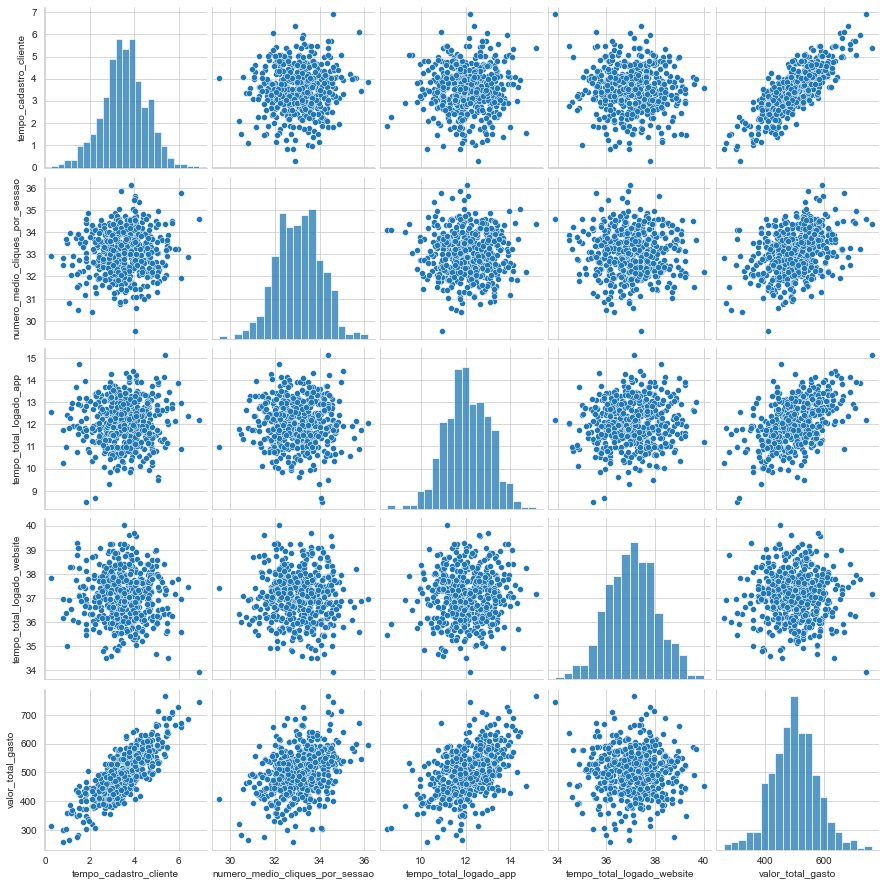

In [12]:
# Plotando a correlação
sns.pairplot(dados)

### Análise 1 - Relação entre Tempo no Web Site e Valor Gasto

<Figure size 1296x864 with 0 Axes>

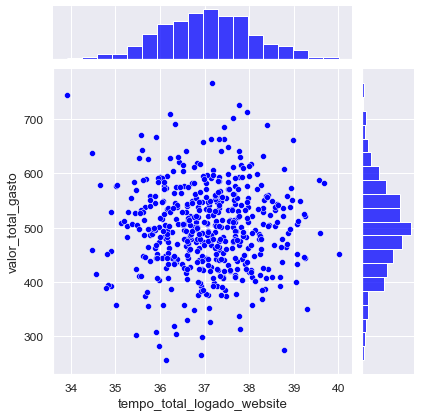

In [13]:
# Plot
plt.figure(figsize=(18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data=dados, 
             x = 'tempo_total_logado_website', 
             y = 'valor_total_gasto',
             color = 'blue')


Observando os histogramas, podemos ver que os dados estão normalmente distribuídos(seguem uma distribuição normal).

Observando o gráfico de dispersão, não parece haver correlação entre as duas variáveis. Vamos confirmar calculando o coeficiente de correlação entre elas.

In [14]:
# Obtendo o coeficiente de correlação
dados[['tempo_total_logado_website', 'valor_total_gasto']].corr()

,tempo_total_logado_website,valor_total_gasto
tempo_total_logado_website,1.000000,-0.002641
valor_total_gasto,-0.002641,1.000000


Não parece haver correlaçaõ entre o tempo logado no website e o valor gasto pelos clientes

### Análise 2 - Relação Entre Tempo no App e Valor Gasto

In [15]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1296x864 with 0 Axes>

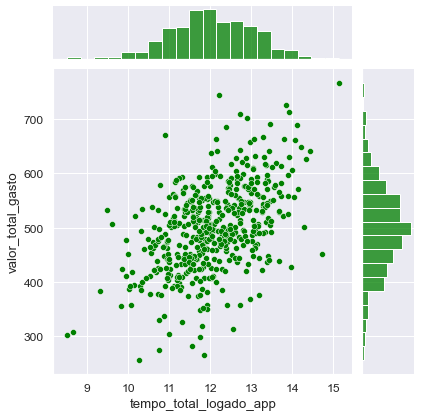

In [16]:
# Gráfico
plt.figure(figsize=(18,12))
sns.set(font_scale=1.1)
sns.jointplot(data=dados, 
              x = 'tempo_total_logado_app',
              y = 'valor_total_gasto',
              color = 'green')

In [17]:
# Verificando o coeficiente de correlação.
dados[['tempo_total_logado_app', 'valor_total_gasto']].corr()

,tempo_total_logado_app,valor_total_gasto
tempo_total_logado_app,1.000000,0.499328
valor_total_gasto,0.499328,1.000000


Os dados tem uma correlação positiva moderada. Podemos deduzir que o valor total gasto mensalmente tende a aumentar se o cliente passsar mais tempo logado no app.

### Análise 3 - Relação entre Tempo na App e Tempo de Cadastro

In [18]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1296x864 with 0 Axes>

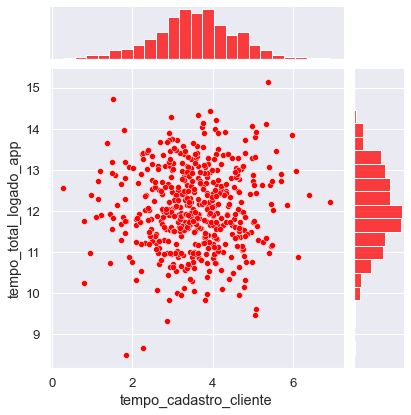

In [19]:
# Plotando
plt.figure(figsize=(18,12))
sns.set(font_scale=1.2)
sns.jointplot(data=dados,
              x = 'tempo_cadastro_cliente',
              y = 'tempo_total_logado_app',
              color = 'red')

In [20]:
dados[['tempo_cadastro_cliente', 'tempo_total_logado_app']].corr()

,tempo_cadastro_cliente,tempo_total_logado_app
tempo_cadastro_cliente,1.000000,0.029143
tempo_total_logado_app,0.029143,1.000000


obserando os histogramas, podemos ver que os dados estão normalmente distribuídos(seguem uma distribuição normal).

A partir do gráfico de dispersão podemos ver que os dados são muito densos no meio do gráfico, não havendo uma correlação clara. Podemos deduzir que existem muitos clientes que são membroa há 3-4 anos e gastam aproximadamente 11,5 a 12,5 minutos no app.

### Análise 4 - Relação Entre Tempo de Cadastro e Valor Gasto

<Figure size 1296x864 with 0 Axes>

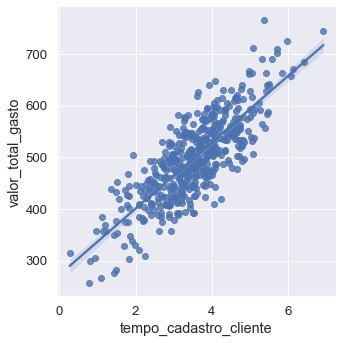

In [21]:
# Plot do gráfico
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.lmplot(data = dados,
              x = 'tempo_cadastro_cliente',
              y = 'valor_total_gasto')

In [22]:
# Coeficiente de correlação

dados[['tempo_cadastro_cliente', 'valor_total_gasto']].corr()

,tempo_cadastro_cliente,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.809084
valor_total_gasto,0.809084,1.000000


A partir do plot e do coeficiente de correlação, podemos ver que o tempo de cadastro e o valor total gasto tem uma forte correlaçaõ positiva, ou seja, à medida que o cliente se torna mais antigo (mais tempo de cadastro), o valor total gasto por clientes também aumenta.

Outra coisa a se notar é que a sombra ao redor da linha é muito fina, o que significa que o erro entre a estimativa (linha) e os pontos de dados são relativamente pequenos.

### Análise 5 - Relação Entre Tempo Logado no App e Tempo Logado no Website

<Figure size 1296x864 with 0 Axes>

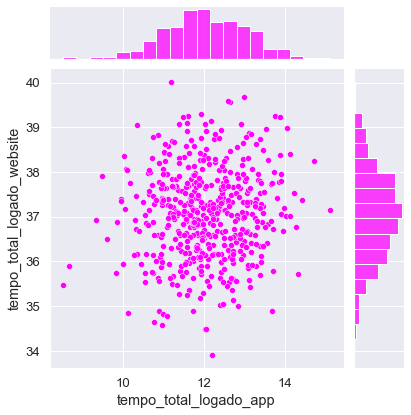

In [23]:
# Plot
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados,
              x = 'tempo_total_logado_app',
              y = 'tempo_total_logado_website',
              color = 'magenta')

Não detectamos problemas críticos e podemos seguir adiante. Vamos manter a variável preditora com baixa correlação e validar essa relação coma variável alvo no modelo final.

### Pré-processamento dos Dados.

In [24]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [25]:
# Variáveis de entrada (variáveis preditoras)
X = dados[['tempo_cadastro_cliente', 
           'numero_medio_cliques_por_sessao',
           'tempo_total_logado_app',
           'tempo_total_logado_website']]

In [26]:
y = dados['valor_total_gasto']

In [27]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [28]:
len(X_treino)

350

In [29]:
len(X_teste)

150

### Padronização

In [30]:
scaler = StandardScaler()

In [31]:
scaler.fit(X_treino)

StandardScaler()

In [32]:
X_treino = scaler.transform(X_treino)

In [33]:
X_teste = scaler.transform(X_teste)

In [34]:
X_treino[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

In [35]:
X_teste[:5]

array([[-0.74134552,  0.35042401,  1.32428694,  0.85663193],
       [ 0.51634261,  0.33850011,  1.36472848,  0.1071885 ],
       [ 1.22462847, -0.84278168,  1.70184401,  0.88678948],
       [ 0.48199668, -0.30436824, -0.65228214, -1.76956776],
       [ 1.88519232, -0.14493923,  0.70658414, -1.44006612]])

### Construção, Treinamento e Avaliação do Modelo 1 com Regressão Linear (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [36]:
# Criando o modelo
modelo_v1 = LinearRegression()

In [37]:
# Treina o modelo
modelo_v1.fit(X_treino, y_treino)

LinearRegression()

In [38]:
print('Coeficientes: \n', modelo_v1.coef_)

Coeficientes: 
 [63.74220716 26.23901606 38.57185551  0.6847366 ]


In [40]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


### Avaliação do Modelo

In [41]:
# Previsão com dados de testes
pred_v1 = modelo_v1.predict(X_teste)

In [42]:
# Imprime as 10 primeiras previsões
pred_v1[:10]

array([513.06429807, 593.96597774, 621.6550031 , 495.82353395,
       642.08919639, 615.61800045, 592.1273355 , 493.61084354,
       457.58835597, 532.03644608])

Text(0, 0.5, 'Valor Previsto de Y')

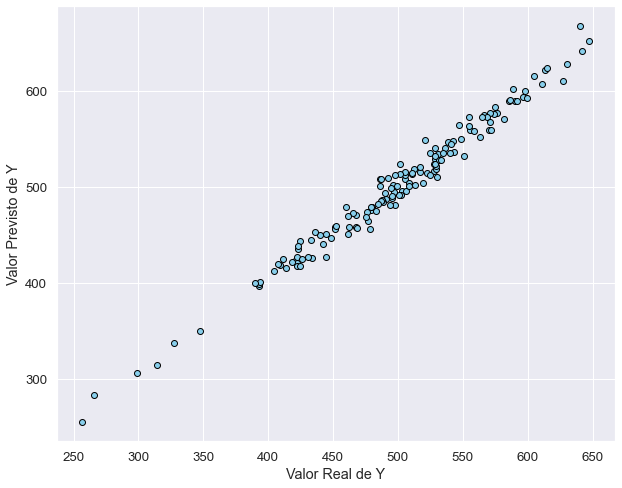

In [44]:
# Plot
plt.figure(figsize=(10,8))
plt.scatter(x = y_teste, y = pred_v1, color='skyblue', edgecolors='black')
plt.xlabel("Valor Real de Y")
plt.ylabel("Valor Previsto de Y")

A partir do gráfico de dispersão, podemos ver que há uma correlação muito forte entre os y's previstos e os y's reais nos dados de teste. Isso significa que temos um modelo muito bom.

### Métricas

In [45]:
# Valor médio gasto pelos clientes
dados['valor_total_gasto'].mean()

499.31403826080003

In [46]:
# Valor mínimo
dados['valor_total_gasto'].min()

256.6705823

In [47]:
# Valor máximo
dados['valor_total_gasto'].max()

765.5184619

In [48]:
# MAE - Erro Médio Absoluto
mean_absolute_error(y_teste, pred_v1)

7.762418645778983

O MAE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 7,76 reais, o que é um valor pequeno comparado ao valor médio gasto por clientes.

In [49]:
# RMSE - Erro Quadrático Médio
np.sqrt(mean_squared_error(y_teste, pred_v1))

9.74456479707466

O RMSE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 9,74 reais, que é um valor pequeno comparado ao valor médio gasto por clientes.

In [50]:
# Coeficiente R2
r2_score(y_teste, pred_v1)

0.9813622791776302

In [51]:
# Variância Explicada
explained_variance_score(y_teste, pred_v1)

0.9817449183428639

Nosso modelo é capaz de explicar 98% da variância dos dados, o que é excelente.

O coeficiente R2 de 98% e as outras métricas, demosntram que este é um modelo muito bom. Será que conseguimos melhorar essa performance?

### Resíduos

[(0.0, 0.055)]

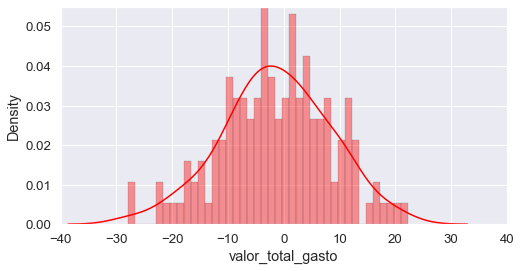

In [52]:
# Plot
plt.figure(figsize= (8, 4))
ax = sns.distplot((y_teste - pred_v1), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055))

Os resíduos são aproximadamente normalmente distribuídos, o que indica um bom ajuste do modelo.

### Contrução, Treinamento e Avaliação do Modelo 2 com Regressão Ridge

https://scikit-learn.org/stable/modeules/generated/sklearn.linear_model.Ridge.html

In [53]:
# Criar o modelo 
modelo_v2 = Ridge(alpha=1.0)

In [54]:
# Treinamento
modelo_v2.fit(X_treino, y_treino)

Ridge()

In [55]:
print('Coeficiente: \n', modelo_v2.coef_)

Coeficiente: 
 [63.57245999 26.17198131 38.46758178  0.68013543]


In [58]:
df_coef_v2 = pd.DataFrame(modelo_v2.coef_, X.columns, columns = ['Coeficiente'])
df_coef_v2

,Coeficiente
tempo_cadastro_cliente,63.572460
numero_medio_cliques_por_sessao,26.171981
tempo_total_logado_app,38.467582
tempo_total_logado_website,0.680135


In [59]:
# Previsão com dados de teste
pred_v2 = modelo_v2.predict(X_teste)
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

# Plot
plt.figure(figsize=(10,8))
plt.scatter(x=y_teste, y = pred_v2, color='skyblue', edgecolors='black')
plt.xlabel('Valor real de Y')
plt.ylabel('Valor previsto de Y');

In [61]:
# MAE
mean_absolute_error(y_teste, pred_v2)

7.764151148981961

In [62]:
# MSE
mean_squared_error(y_teste, pred_v2)

94.93731602493467

In [63]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v2))

9.7435781941202

In [64]:
# Coeficiente R2
r2_score(y_teste, pred_v2)

0.981366052994101

In [65]:
# Variância explicada
explained_variance_score(y_teste, pred_v2)

0.9817472659016085

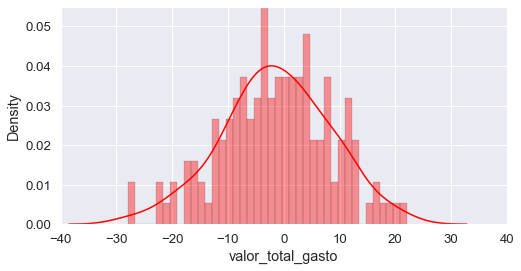

In [66]:
# Plot resíduos
plt.figure(figsize=(8,4))
ax = sns.distplot((y_teste - pred_v2), 
                  bins = 40, 
                  color = 'red',
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

### Construção, Treinamento e Avaliação do Modelo 3 com Regressão LASSO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [67]:
# Criar o modelo
modelo_v3 = Lasso(alpha=1.0)

In [68]:
# Treinamento do modelo
modelo_v3.fit(X_treino, y_treino)

Lasso()

In [69]:
print('Coeficientes: \n', modelo_v3.coef_)

Coeficientes: 
 [62.86344076 25.18747244 37.62149243  0.        ]


In [70]:
df_coef_v3 = pd.DataFrame(modelo_v3.coef_, X.columns, columns=['Coeficiente'])
df_coef_v3

,Coeficiente
tempo_cadastro_cliente,62.863441
numero_medio_cliques_por_sessao,25.187472
tempo_total_logado_app,37.621492
tempo_total_logado_website,0.000000


In [71]:
# Previsões com dados de testes
pred_v3 = modelo_v3.predict(X_teste)
pred_v3[:5]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717])

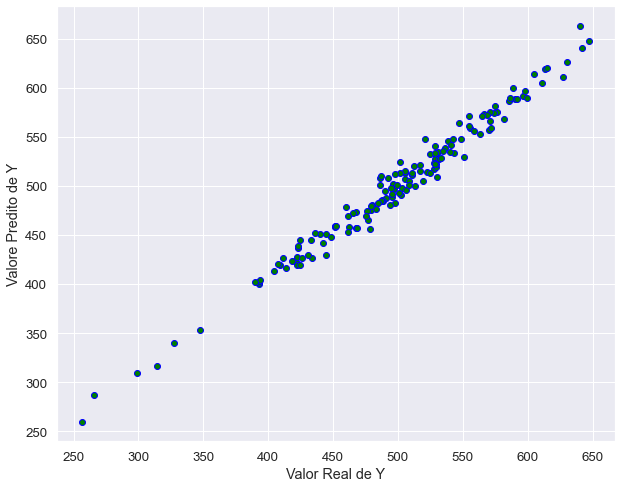

In [72]:
# Plot
plt.figure(figsize=(10,8))
plt.scatter(x = y_teste, y=pred_v3, color = 'green', edgecolors='blue')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valore Predito de Y');

In [73]:
# MAE
mean_absolute_error(y_teste, pred_v3)

7.7885046969510645

In [74]:
# MSE
mean_squared_error(y_teste, pred_v3)

96.05606348970672

In [75]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v3))

9.800819531534428

In [76]:
# Coeficiente R2
r2_score(y_teste, pred_v3)

0.981146469358873

In [77]:
# Variância Explicada
explained_variance_score(y_teste, pred_v3)

0.9815600649101045

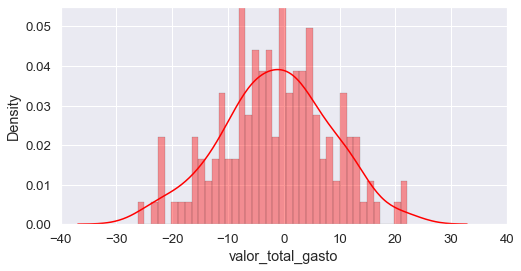

In [78]:
# Plot resíduos
plt.figure(figsize=(8,4))
ax = sns.distplot((y_teste - pred_v3), 
                  bins = 40, 
                  color = 'red',
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));


### Seleção do Modelo

O modelo 3 apresentou uma taxa de erro (RMSE) levemente maior e pode ser descartado. Os modelo 1 e 2 ficaram muito próximos e nesse caso devemos escolher o modelo mais simples, que em nosso exemplo é o modelo 1.

### Conclusão

In [79]:
dados.head()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


In [82]:
# Coeicientes
df_coef_final = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef_final

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


**Interpretações dos Coeficientes**

- Mantendo todos os outros recursos fixo, um aumento de 1 unidade no tempo de cadastro do cliente está associado a um aumento de R$ 63.74 no valor total gasto por cliente por mês

- Mantendo todos os outros recursos fixo, um auemnto de 1 unidade no número médio de clieques por sessão, está associado a um aumento de R4 26,24 no valor total gasto por cliente por mês

- Mantendo todos os outros recursos fixo, um aumento de 1 unidade no tempo total logado na app está associado a um aumento de R4 38,57 no valor total gasto por cliente por mês.

- Mantendo todos os outros recursos fixo, um aumento de 1 unidade no tempo total logado no website está associado a um aumento de R$ 0,68 no valor total gasto por cliente por mês.
    

Podemos ver que será mais lucrativo para a empresa investir na atualização de sua app uma vez que o retorno será maior. Além disso, é importante criar políticas para reter o cliente por mais tempo, já que isso também leva ao aumento das vendas. A própria atualização da App será uma forma de reter o cliente por mais tempo.

Não compensa, neste momento, investir na atualização do website pois o retorno será mínimo.

### Fim.